In [11]:
from goes2go.data import goes_latest, goes_timerange
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime as dt
import xarray as xr
import glob
from PIL import Image
import requests
from rich import print, print_json

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/vscode/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

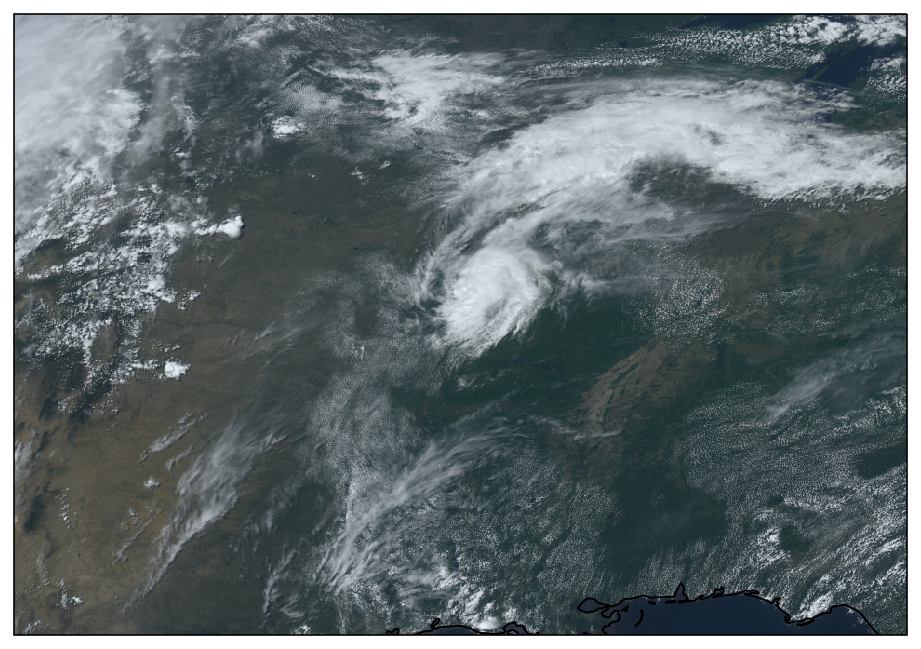

In [2]:
# Download a GOES ABI dataset
G = goes_latest(product='ABI')

# Make figure on Cartopy axes
fig = plt.figure(figsize=(8,6), dpi=144)
ax = plt.subplot(projection=G.rgb.crs )
ax.imshow(G.rgb.NaturalColor(), **G.rgb.imshow_kwargs)
ax.set_extent((-105, -85, 30, 47))

ax.coastlines()
print(fig.dpi)

In [3]:
end = dt.datetime.utcnow()
start = end - dt.timedelta(minutes=120)
save_dir = "/tmp"

g = goes_timerange(start, end,
                   satellite='goes16',
                   product='ABI',
                   save_dir=save_dir,
                   return_as='filelist')

g

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [23] files to [/tmp/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

,file,start,end,creation
0,noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L...,2022-06-04 17:31:17.600,2022-06-04 17:33:54.900,2022-06-04 17:34:06.100
1,noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L...,2022-06-04 17:36:17.600,2022-06-04 17:38:55.500,2022-06-04 17:39:06.200
2,noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L...,2022-06-04 17:41:17.600,2022-06-04 17:43:54.900,2022-06-04 17:44:05.100
3,noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L...,2022-06-04 17:46:17.600,2022-06-04 17:48:55.500,2022-06-04 17:49:06.500
4,noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L...,2022-06-04 17:51:17.600,2022-06-04 17:53:55.500,2022-06-04 17:54:05.300
5,noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L...,2022-06-04 17:56:17.600,2022-06-04 17:58:55.500,2022-06-04 17:59:06.000
6,noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L...,2022-06-04 18:01:17.600,2022-06-04 18:03:56.100,2022-06-04 18:04:05.600
7,noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L...,2022-06-04 18:06:17.600,2022-06-04 18:08:54.900,2022-06-04 18:09:05.600
8,noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L...,2022-06-04 18:11:17.600,2022-06-04 18:13:55.500,2022-06-04 18:14:06.700
9,noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L...,2022-06-04 18:16:17.600,2022-06-04 18:18:55.500,2022-06-04 18:19:06.100


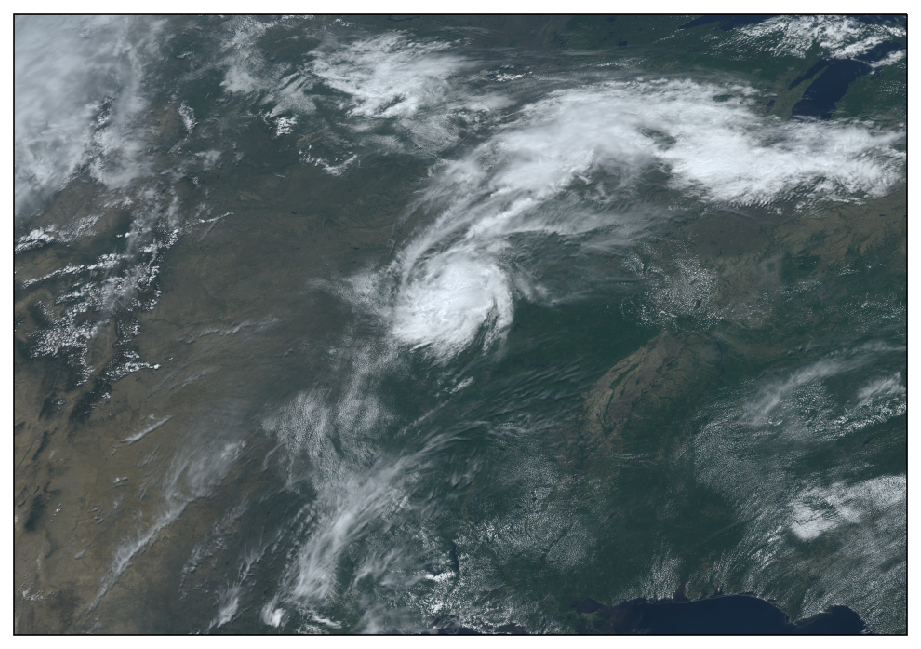

In [4]:
product = xr.open_dataset(f"{save_dir}/{g.iloc[0].file}")

fig = plt.figure(figsize=(8,6), dpi=144)
ax = fig.add_subplot(1,1,1, projection=product.rgb.crs )
ax.imshow(product.rgb.NaturalColor(), **product.rgb.imshow_kwargs)
#ax.coastlines()
ax.set_extent((-105, -85, 30, 47))


In [5]:
list_of_pngs = []

for index, row in g.iterrows():
    fig = plt.figure(figsize=(8,6), dpi=144)
    nc_file = row.file
    print(nc_file)
    product = xr.open_dataset(f"{save_dir}/{nc_file}")
    ax = plt.subplot(projection=product.rgb.crs )
    ax.imshow(product.rgb.NaturalColor(), **product.rgb.imshow_kwargs)
    #ax.coastlines()
    ax.set_extent((-105, -85, 30, 47))
    png_file_name = f"test{index}.png"
    plt.savefig(png_file_name, format="png")
    list_of_pngs.append(png_file_name)
    plt.close()
    del(fig)
    del(ax)

noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L2-MCMIPC-M6_G16_s20221551731176_e20221551733549_c20221551734061.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L2-MCMIPC-M6_G16_s20221551736176_e20221551738555_c20221551739062.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L2-MCMIPC-M6_G16_s20221551741176_e20221551743549_c20221551744051.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L2-MCMIPC-M6_G16_s20221551746176_e20221551748555_c20221551749065.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L2-MCMIPC-M6_G16_s20221551751176_e20221551753555_c20221551754053.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/17/OR_ABI-L2-MCMIPC-M6_G16_s20221551756176_e20221551758555_c20221551759060.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L2-MCMIPC-M6_G16_s20221551801176_e20221551803561_c20221551804056.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L2-MCMIPC-M6_G16_s20221551806176_e20221551808549_c20221551809056.nc
noaa-goes16/ABI-L2-MCMIPC/2022/155/18/OR_ABI-L2-MCMIPC-M6_G16_s20221551811176_e20221551813555_c2

In [6]:
def make_gif(list_of_images):
    frames = [Image.open(image) for image in list_of_pngs]
    frame_one = frames[0]
    frame_one.save("test.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [7]:
make_gif(list_of_images=list_of_pngs)

In [13]:
def get_storm_info():
    url = "https://www.nhc.noaa.gov/CurrentStorms.json"
    resp = requests.get(url)
    return resp.json()

In [16]:

storm_info = get_storm_info()['activeStorms'][0]
storm_coords = (storm_info['longitudeNumeric'], storm_info['latitudeNumeric'])
print(storm_coords)

(-80.5, 27.3)

In [22]:
def make_centered_extent(lon, lat, width, height):
    x_min = lon - (width / 2)
    x_max = lon + (width / 2)
    y_min = lat - (height / 2)
    y_max = lat + (height / 2)
    return (x_min, x_max, y_min, y_max)

In [23]:
make_centered_extent(lon=storm_coords[0], lat=storm_coords[1], width=10, height=10)

(-85.5, -75.5, 22.3, 32.3)

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/vscode/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

144

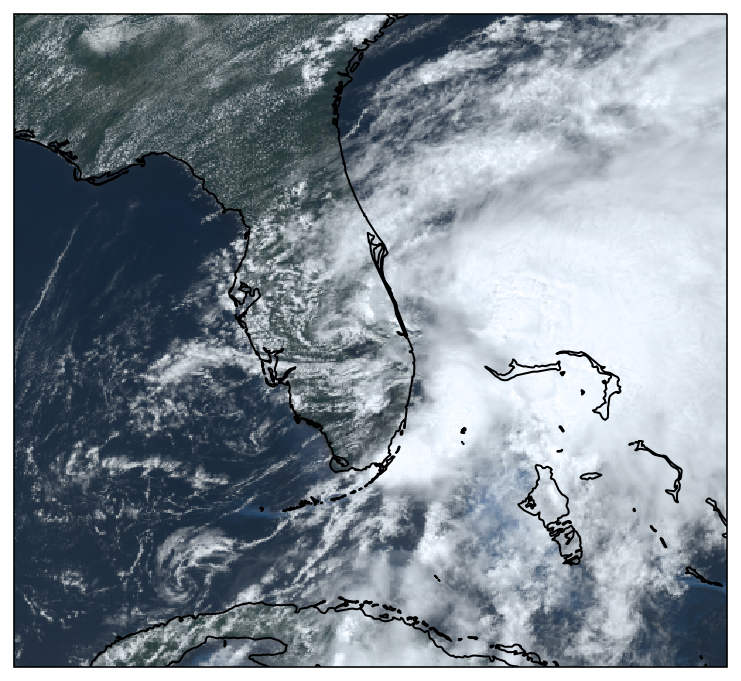

In [27]:
from goes2go.data import goes_nearesttime

G = goes_nearesttime(dt.datetime(2022, 6, 4, 18),
                     satellite='goes16',
                     product='ABI',
                     return_as='xarray')

# Make figure on Cartopy axes
fig = plt.figure(figsize=(8,6), dpi=144)
ax = plt.subplot(projection=G.rgb.crs )
ax.imshow(G.rgb.NaturalColor(), **G.rgb.imshow_kwargs)
ax.set_extent(make_centered_extent(lon=storm_coords[0], lat=storm_coords[1], width=10, height=10))

ax.coastlines()
print(fig.dpi)